In [17]:
import glob
from warnings import simplefilter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

import diagnostic_lines

simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

COLOR_STARS = '#e1be6a'
COLOR_AGN = '#40b0a6'

BPASS_solar = pd.read_csv('../data/BPASS_all_solar_models.csv')
AGN_solar = pd.read_csv('../data/AGN_solar.csv')
BPASS_solar = BPASS_solar[BPASS_solar.age <= 8]

Z_grid = np.sort(BPASS_solar.zgas.unique())
logU_grid = np.arange(-4, -0.75, 0.25)

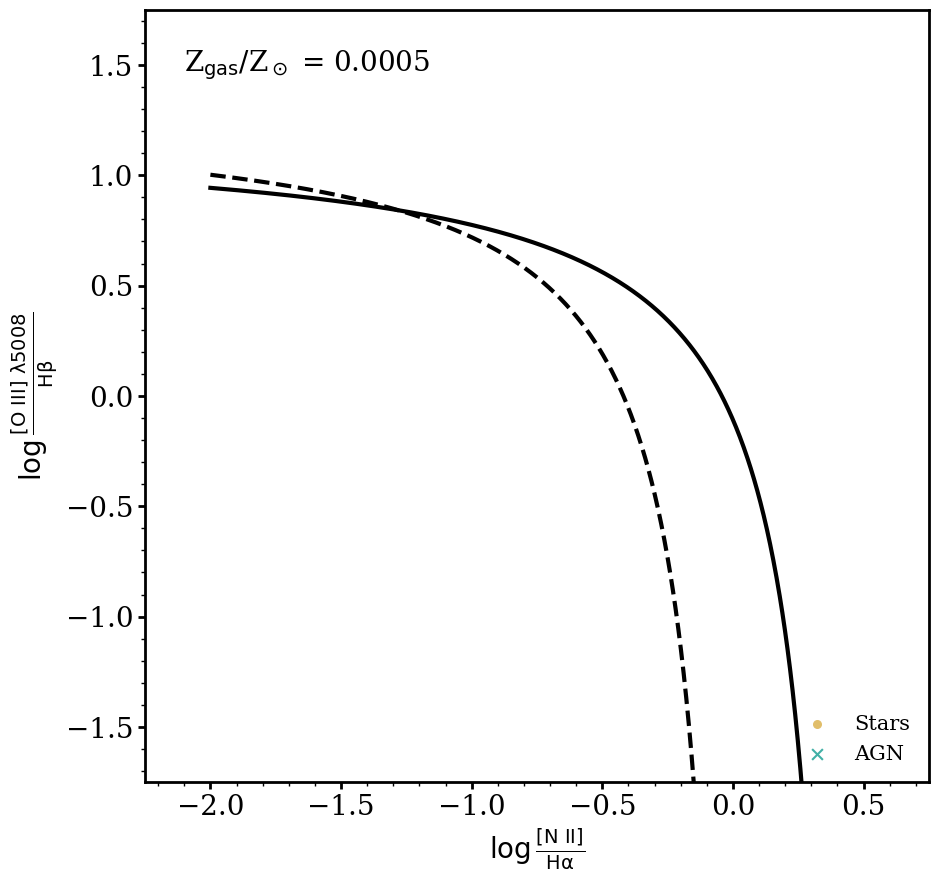

In [18]:
def make_animation_bpt_zgas(Z_grid):
    fig, ax = plt.subplots(1, 1)
    plt.tight_layout()
    fig.set_size_inches(10,10)


    def animate(frame):
        ax.clear()
        zgas = Z_grid[frame]        
        subdf_bpass = BPASS_solar[(BPASS_solar.zgas == zgas)]
        subdf_agn = AGN_solar[(AGN_solar.zgas == zgas)]

        ax.scatter(np.log10(subdf_bpass['N_2_6583.45A']/subdf_bpass['H_1_6562.81A']), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
                c=COLOR_STARS, alpha=1.0,  zorder=-9,s=30, label='Stars')
        ax.scatter(np.log10(subdf_agn['N_2_6583.45A']/subdf_agn['H_1_6562.81A']), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                c=COLOR_AGN, marker='x', alpha=1.0,  zorder=-9, s=60, label='AGN')
        diagnostic_lines.plot_bpt_kewley_2001(ax, label=False)
        diagnostic_lines.plot_bpt_kauffmann_2003(ax, label=False)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        ax.set_xlabel(r'$\log\frac{\rm{[N~II]}}{\rm{H}\alpha}$')
        ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        ax.annotate(f'Z$_\mathrm{{gas}}/$Z$_\odot$ = {zgas}', (0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20)
        ax.legend(loc='lower right', fontsize=15, frameon=False)

    ani = FuncAnimation(fig, animate, frames=len(Z_grid),
                        interval=5, repeat=True)
    ani.save('../figures/animations/bpt_zgas.gif', dpi=300, writer=PillowWriter(fps=len(Z_grid)/2))

make_animation_bpt_zgas(Z_grid)

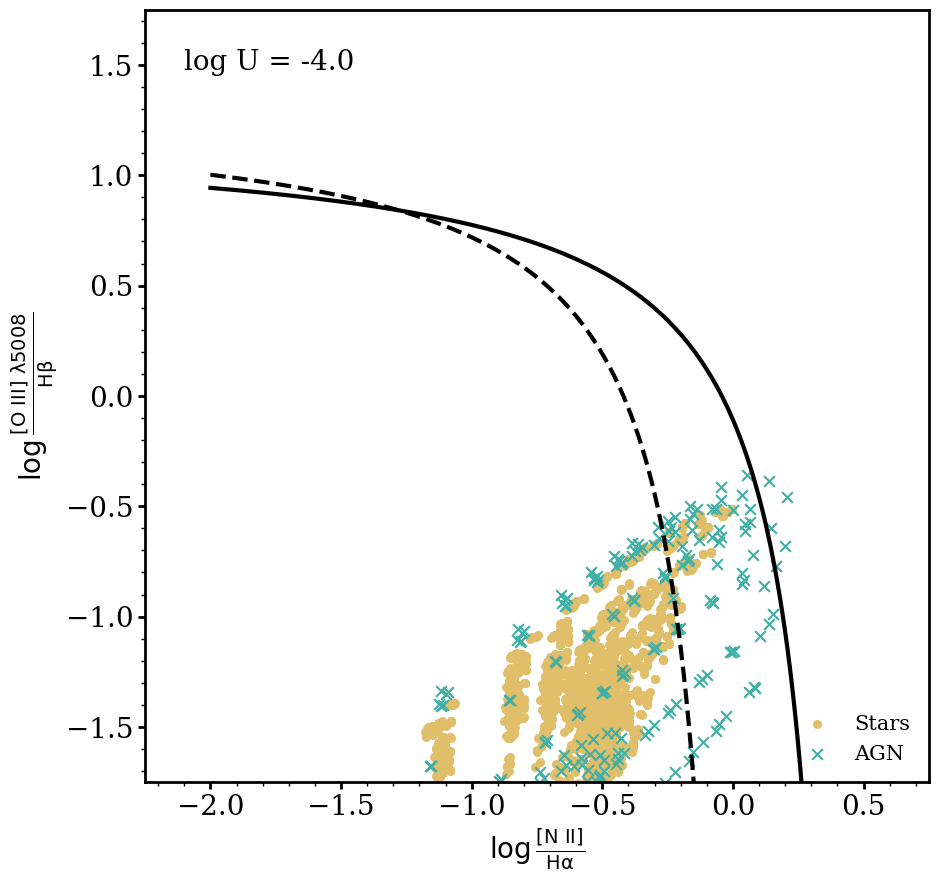

In [19]:
def make_animation_bpt_logU(logU_grid):
    fig, ax = plt.subplots(1, 1)
    plt.tight_layout()
    fig.set_size_inches(10,10)

    def animate(frame):
        ax.clear()
        logU = logU_grid[frame]        
        subdf_bpass = BPASS_solar[(BPASS_solar.logU == logU)]
        subdf_agn = AGN_solar[(AGN_solar.logU == logU)]

        ax.scatter(np.log10(subdf_bpass['N_2_6583.45A']/subdf_bpass['H_1_6562.81A']), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
                c=COLOR_STARS, alpha=1.0,  zorder=-9,s=30, label='Stars')
        ax.scatter(np.log10(subdf_agn['N_2_6583.45A']/subdf_agn['H_1_6562.81A']), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                c=COLOR_AGN, marker='x', alpha=1.0,  zorder=-9, s=60, label='AGN')
        diagnostic_lines.plot_bpt_kewley_2001(ax, label=False)
        diagnostic_lines.plot_bpt_kauffmann_2003(ax, label=False)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        ax.set_xlabel(r'$\log\frac{\rm{[N~II]}}{\rm{H}\alpha}$')
        ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        ax.annotate(f'log U = {logU}', (0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20)
        ax.legend(loc='lower right', fontsize=15, frameon=False)

    ani = FuncAnimation(fig, animate, frames=len(logU_grid),
                        interval=5, repeat=True)
    ani.save('../figures/animations/bpt_logU.gif', dpi=300, writer=PillowWriter(fps=len(logU_grid)/2))

make_animation_bpt_logU(logU_grid)

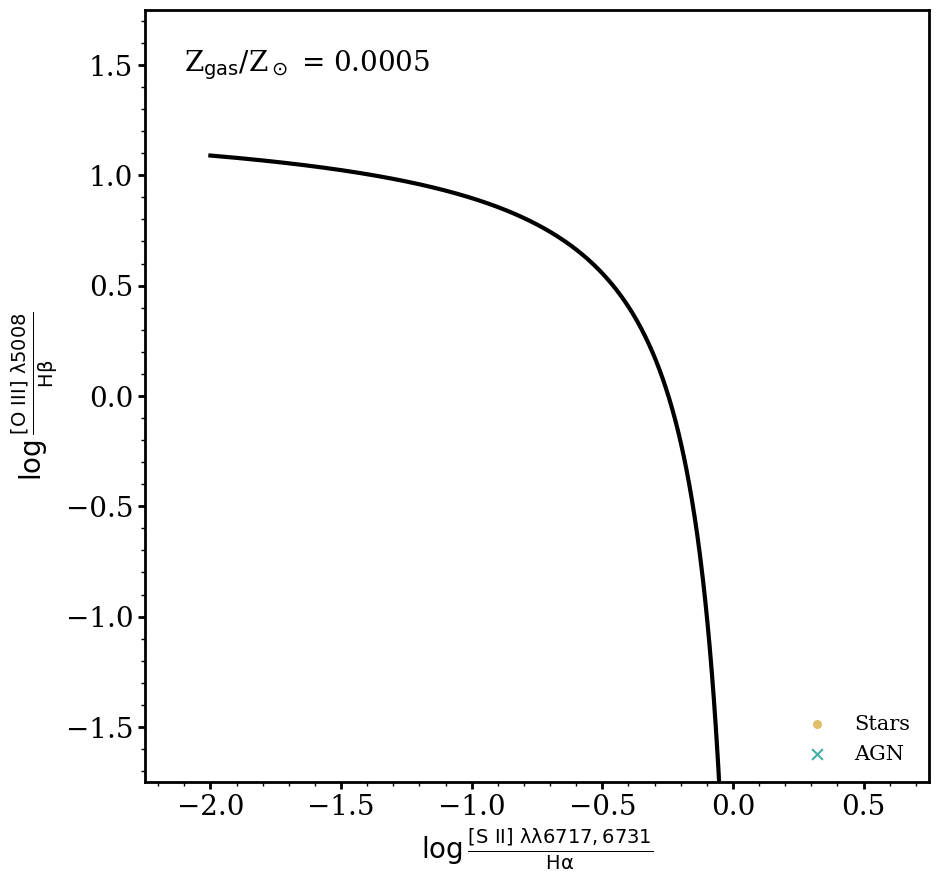

In [20]:
def make_animation_vo87_zgas(Z_grid):
    fig, ax = plt.subplots(1, 1)
    plt.tight_layout()
    fig.set_size_inches(10,10)

    def animate(frame):
        ax.clear()
        zgas = Z_grid[frame]        
        subdf_bpass = BPASS_solar[(BPASS_solar.zgas == zgas)]
        subdf_agn = AGN_solar[(AGN_solar.zgas == zgas)]

        ax.scatter(np.log10((subdf_bpass['S_2_6716.44A']+subdf_bpass['S_2_6730.82A'])/subdf_bpass['H_1_6562.81A']), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
                   c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=30)
        ax.scatter(np.log10((subdf_agn['S_2_6716.44A']+subdf_agn['S_2_6730.82A'])/subdf_agn['H_1_6562.81A']), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                   c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', zorder=-9, s=60)
        diagnostic_lines.plot_vo87_trump_2015(ax, label=False)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6717,6731}{\rm{H}\alpha}$')
        ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        ax.annotate(f'Z$_\mathrm{{gas}}/$Z$_\odot$ = {zgas}', (0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20)
        ax.legend(loc='lower right', fontsize=15, frameon=False)

    ani = FuncAnimation(fig, animate, frames=len(Z_grid),
                        interval=5, repeat=True)
    ani.save('../figures/animations/vo87_zgas.gif', dpi=300, writer=PillowWriter(fps=len(Z_grid)/2))

make_animation_vo87_zgas(Z_grid)

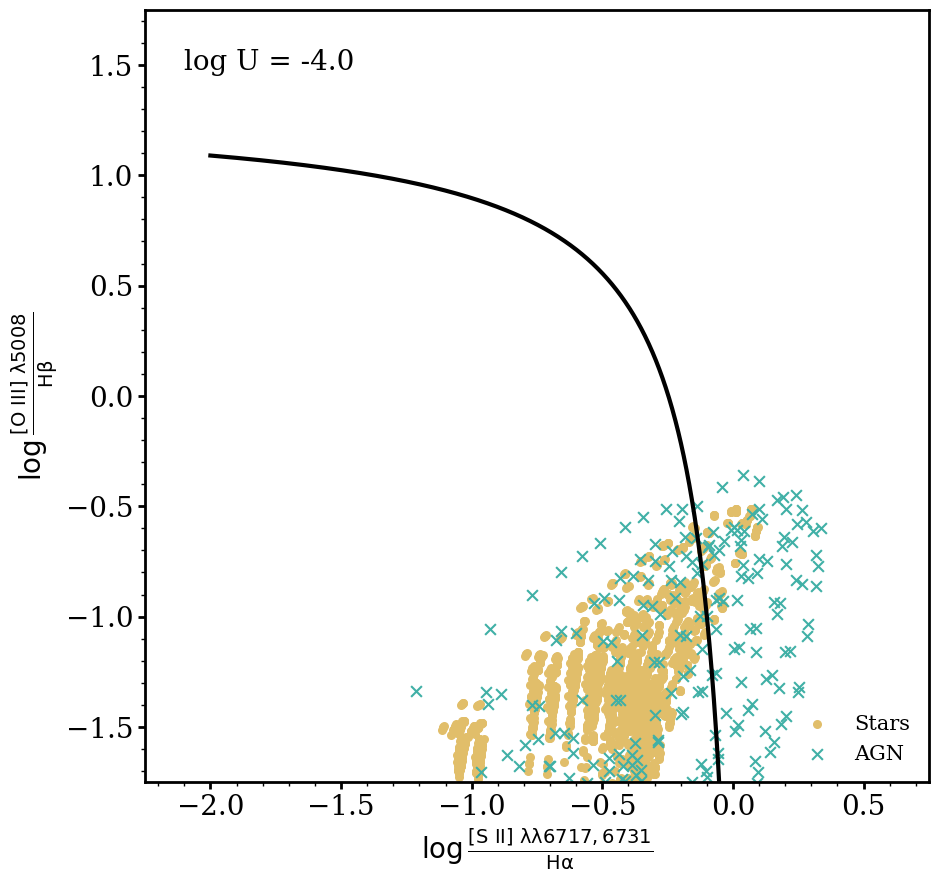

In [21]:
def make_animation_vo87_logU(logU_grid):
    fig, ax = plt.subplots(1, 1)
    plt.tight_layout()
    fig.set_size_inches(10,10)

    def animate(frame):
        ax.clear()
        logU = logU_grid[frame]        
        subdf_bpass = BPASS_solar[(BPASS_solar.logU == logU)]
        subdf_agn = AGN_solar[(AGN_solar.logU == logU)]

        ax.scatter(np.log10((subdf_bpass['S_2_6716.44A']+subdf_bpass['S_2_6730.82A'])/subdf_bpass['H_1_6562.81A']), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
                   c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=30)
        ax.scatter(np.log10((subdf_agn['S_2_6716.44A']+subdf_agn['S_2_6730.82A'])/subdf_agn['H_1_6562.81A']), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                   c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', zorder=-9, s=60)
        diagnostic_lines.plot_vo87_trump_2015(ax, label=False)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6717,6731}{\rm{H}\alpha}$')
        ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        ax.annotate(f'log U = {logU}', (0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20)
        ax.legend(loc='lower right', fontsize=15, frameon=False)

    ani = FuncAnimation(fig, animate, frames=len(logU_grid),
                        interval=5, repeat=True)
    ani.save('../figures/animations/vo87_logU.gif', dpi=300, writer=PillowWriter(fps=len(logU_grid)/2))

make_animation_vo87_logU(logU_grid)

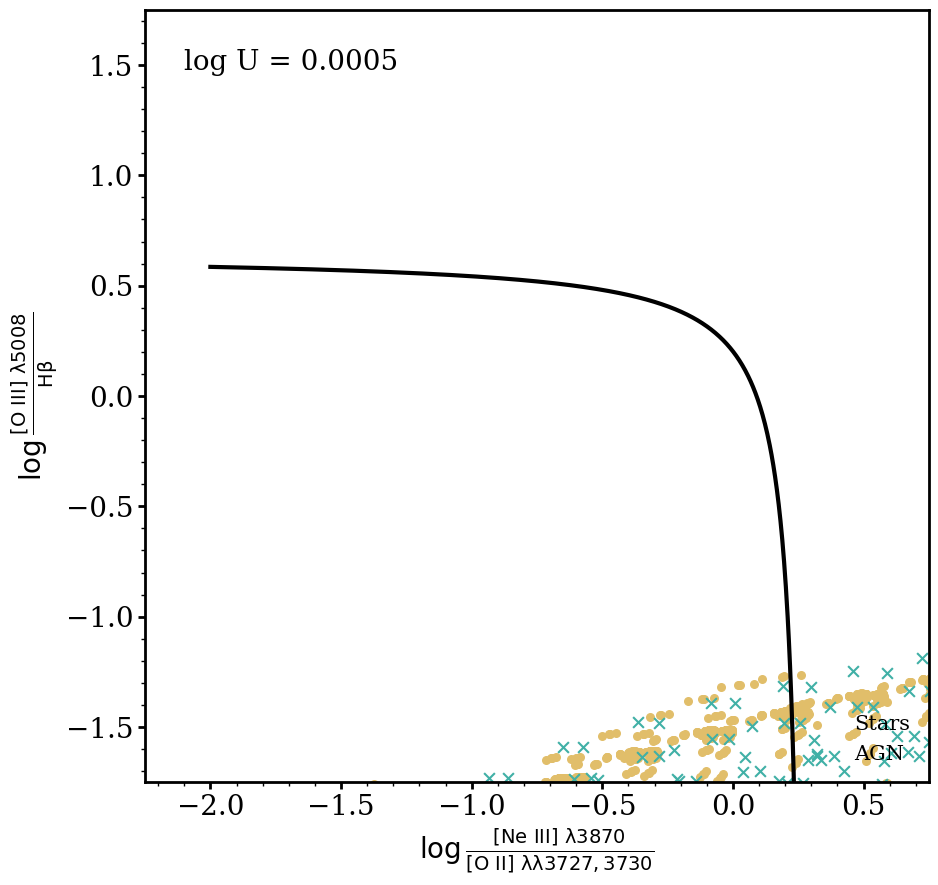

In [22]:
def make_animation_ohno_zgas(Z_grid):
    fig, ax = plt.subplots(1, 1)
    plt.tight_layout()
    fig.set_size_inches(10,10)

    def animate(frame):
        ax.clear()
        zgas = Z_grid[frame]        
        subdf_bpass = BPASS_solar[(BPASS_solar.zgas == zgas)]
        subdf_agn = AGN_solar[(AGN_solar.zgas == zgas)]

        ax.scatter(np.log10(subdf_bpass['Ne_3_3868.76A']/(subdf_bpass['O_2_3726.03A']+subdf_bpass['O_2_3728.81A'])), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
           c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=30)
        ax.scatter(np.log10(subdf_agn['Ne_3_3868.76A']/(subdf_agn['O_2_3726.03A']+subdf_agn['O_2_3728.81A'])), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', zorder=-9, s=60)
        diagnostic_lines.plot_ohno_backhaus_2022(ax, label=False)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
        ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        ax.annotate(f'log U = {zgas}', (0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20)
        ax.legend(loc='lower right', fontsize=15, frameon=False)

    ani = FuncAnimation(fig, animate, frames=len(Z_grid),
                        interval=5, repeat=True)
    ani.save('../figures/animations/ohno_zgas.gif', dpi=300, writer=PillowWriter(fps=len(Z_grid)/2))

make_animation_ohno_zgas(Z_grid)

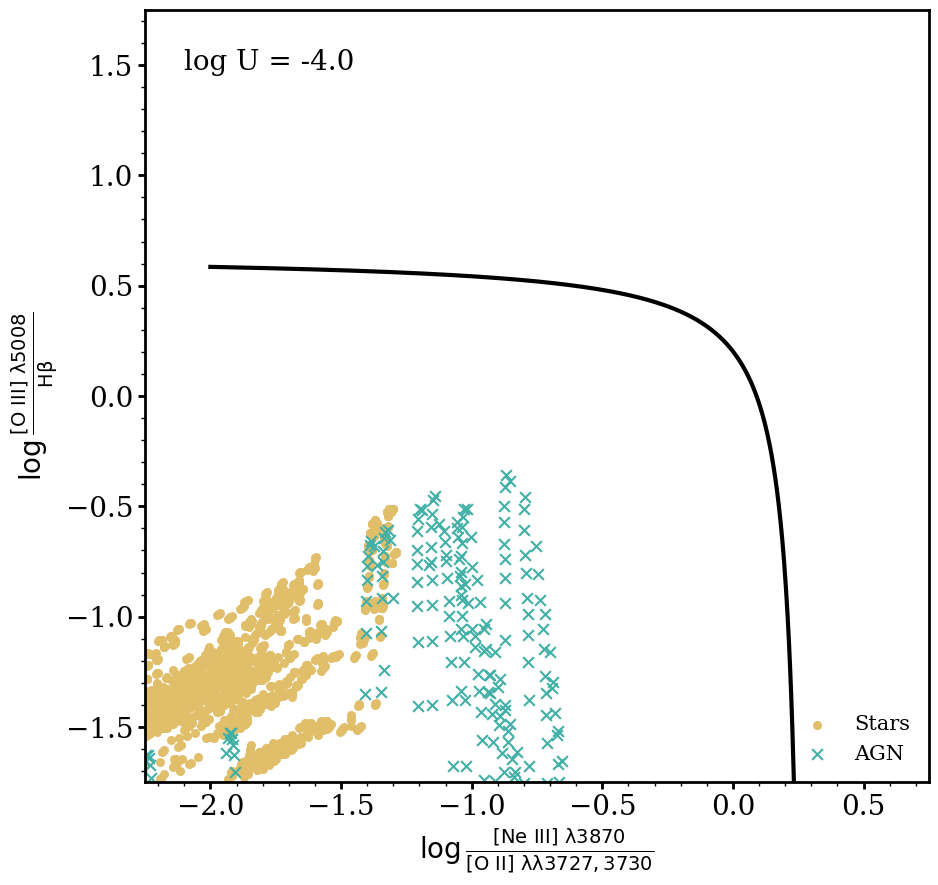

In [23]:
def make_animation_ohno_logU(logU_grid):
    fig, ax = plt.subplots(1, 1)
    plt.tight_layout()
    fig.set_size_inches(10,10)

    def animate(frame):
        ax.clear()
        logU = logU_grid[frame]        
        subdf_bpass = BPASS_solar[(BPASS_solar.logU == logU)]
        subdf_agn = AGN_solar[(AGN_solar.logU == logU)]

        ax.scatter(np.log10(subdf_bpass['Ne_3_3868.76A']/(subdf_bpass['O_2_3726.03A']+subdf_bpass['O_2_3728.81A'])), np.log10(subdf_bpass['O_3_5006.84A']/subdf_bpass['H_1_4861.33A']), 
           c=COLOR_STARS, alpha=1.0, label='Stars', zorder=-9, s=30)
        ax.scatter(np.log10(subdf_agn['Ne_3_3868.76A']/(subdf_agn['O_2_3726.03A']+subdf_agn['O_2_3728.81A'])), np.log10(subdf_agn['O_3_5006.84A']/subdf_agn['H_1_4861.33A']), 
                c=COLOR_AGN, marker='x', alpha=1.0, label='AGN', zorder=-9, s=60)
        diagnostic_lines.plot_ohno_backhaus_2022(ax, label=False)
        ax.set_xlim(-2.25, 0.75)
        ax.set_ylim(-1.75, 1.75)
        ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
        ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
        ax.annotate(f'log U = {logU}', (0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=20)
        ax.legend(loc='lower right', fontsize=15, frameon=False)

    ani = FuncAnimation(fig, animate, frames=len(logU_grid),
                        interval=5, repeat=True)
    ani.save('../figures/animations/ohno_logU.gif', dpi=300, writer=PillowWriter(fps=len(logU_grid)/2))

make_animation_ohno_logU(logU_grid)